Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data Preprocessing


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training model/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names =None,
    batch_size = 32,
    image_size = (64,64),
    color_mode ='rgb',
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3045 files belonging to 36 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Training model/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names =None,
    batch_size = 32,
    image_size = (64,64),
    color_mode ='rgb',
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


Building model

In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters =32, kernel_size =3, activation ='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides =2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters =64, kernel_size =3, activation ='relu'))
cnn.add(tf.keras.layers.Conv2D(filters =64, kernel_size =3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides =2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 752s 8s/step - accuracy: 0.0331 - loss: 12.7303 - val_accuracy: 0.0427 - val_loss: 3.5781
Epoch 2/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.0526 - loss: 3.5786 - val_accuracy: 0.0427 - val_loss: 3.5615
Epoch 3/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.0477 - loss: 3.5672 - val_accuracy: 0.0342 - val_loss: 3.5467
Epoch 4/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.0370 - loss: 3.5568 - val_accuracy: 0.0741 - val_loss: 3.4916
Epoch 5/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.0721 - loss: 3.4976 - val_accuracy: 0.0798 - val_loss: 3.4598
Epoch 6/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.0822 - loss: 3.4615 - val_accuracy: 0.1083 - val_loss: 3.3783
Epoch 7/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.1046 - loss: 3.3732 - val_accuracy: 0.1254 - val_loss: 3.3444
Epoch 8/32
96/96 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.1008 - loss: 3.3386 - val_accuracy: 0.2707 - 

Saving Model


In [ ]:
cnn.save('trained_model.h5')

Recording History

In [ ]:
training_history.history

{'accuracy': [0.0397372730076313,
  0.05320196971297264,
  0.04794745519757271,
  0.04926108196377754,
  0.07422003149986267,
  0.0830870270729065,
  0.10607553273439407,
  0.118883416056633,
  0.18456485867500305,
  0.260755330324173,
  0.3221674859523773,
  0.38325121998786926,
  0.45451560616493225,
  0.5077175498008728,
  0.5448275804519653,
  0.5888341665267944,
  0.6200328469276428,
  0.6765188574790955,
  0.7031198740005493,
  0.7402299046516418,
  0.7638751864433289,
  0.7937602400779724,
  0.8016420602798462,
  0.841050922870636,
  0.8738916516304016,
  0.8781608939170837,
  0.8844006657600403,
  0.9004926085472107,
  0.9270936250686646,
  0.9395730495452881,
  0.9490968585014343,
  0.9477832317352295],
 'loss': [5.872746467590332,
  3.570543050765991,
  3.558438777923584,
  3.5348122119903564,
  3.478186845779419,
  3.4413368701934814,
  3.373131513595581,
  3.271998167037964,
  3.029435396194458,
  2.6943042278289795,
  2.467073440551758,
  2.239504337310791,
  1.96300828456

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

Calculating Accuracy of Model Achieved on validation set

In [ ]:
print("Validation set Accuracy : {} % ".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy : 91.16809368133545 % 


Training visualisation

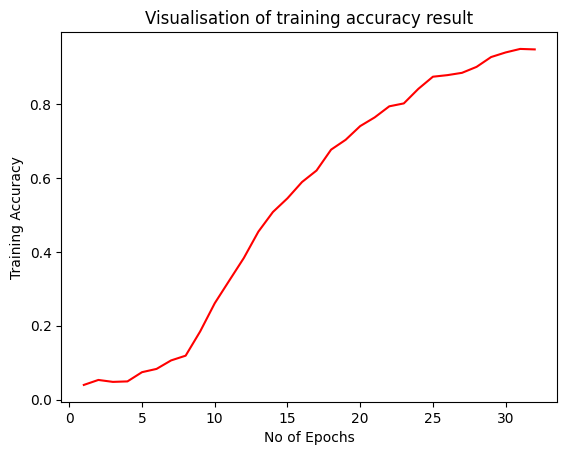

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualisation of training accuracy result')
plt.show()

Validation accuracy

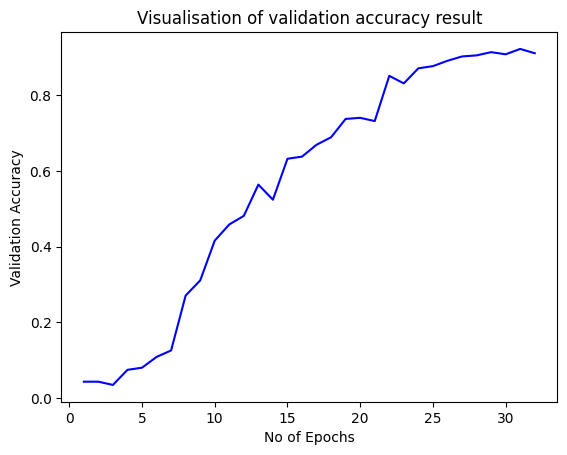

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualisation of validation accuracy result')
plt.show()